In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('fandango_score_comparison.csv')

In [3]:
df.head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.7,4.3,...,3.9,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5


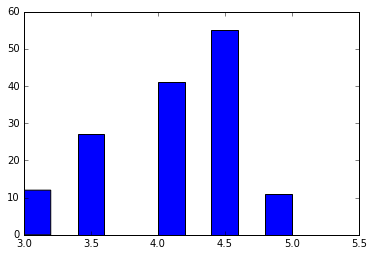

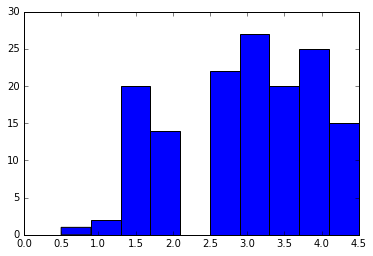

In [4]:
plt.hist(df['Fandango_Stars'])
plt.show()

plt.hist(df['Metacritic_norm_round'])
plt.show()

In [5]:
print('Fandango mean: ' + str(df['Fandango_Stars'].mean()))
print('Metacritic mean: ' + str(df['Metacritic_norm_round'].mean()))

Fandango mean: 4.08904109589
Metacritic mean: 2.97260273973


In [6]:
df['Fandango_Stars'].describe()

count    146.000000
mean       4.089041
std        0.540386
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [7]:
df['Metacritic_norm_round'].describe()

count    146.000000
mean       2.972603
std        0.990961
min        0.500000
25%        2.125000
50%        3.000000
75%        4.000000
max        4.500000
Name: Metacritic_norm_round, dtype: float64

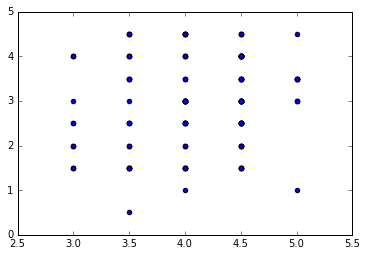

In [8]:
plt.scatter(df['Fandango_Stars'], df['Metacritic_norm_round'])

In [9]:
df['fm_diff'] = abs(df['Metacritic_norm_round'] - df['Fandango_Stars'])

In [10]:
df.sort_values('fm_diff', ascending = False, inplace = True)

In [11]:
df.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [12]:
import scipy.stats

In [13]:
scipy.stats.pearsonr(df['Fandango_Stars'], df['Metacritic_norm_round'])[0]

0.17844919073895918

In [14]:
slope, intercept, rvalue, pvalue, standev = scipy.stats.linregress(df['Metacritic_norm_round'],
                                                                   df['Fandango_Stars'])

In [15]:
def predict_fandango(metacritic_score):
    return (metacritic_score * slope) + intercept

In [16]:
for i in range(6):
    print(str(i) + ': ' + str(predict_fandango(i)))

0: 3.7997739189
1: 3.89708499687
2: 3.99439607485
3: 4.09170715282
4: 4.1890182308
5: 4.28632930877


In [17]:
def predict_fandango_list(lst):
    results = [predict_fandango(item) for item in lst]
    return results

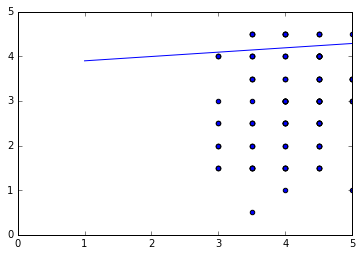

In [18]:
mc_scores = [1.0, 5.0]

fig, ax = plt.subplots()

ax.scatter(df['Fandango_Stars'], df['Metacritic_norm_round'])
ax.plot(mc_scores, predict_fandango_list(mc_scores))

ax.set_xlim(0.0, 5.0)
ax.set_ylim(0.0, 5.0)

plt.show()

In [20]:
df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference', 'fm_diff'],
      dtype='object')

In [21]:
norm_cols = ['Fandango_Stars',
             'RT_user_norm',
             'Metacritic_user_nom',
             'IMDB_norm',
             'RT_user_norm_round',
             'Metacritic_user_norm_round',
             'IMDB_norm_round'
            ]

df_norm = df[norm_cols]

In [22]:
new_col_names = ['fandango',
                 'rt',
                 'mc',
                 'imdb',
                 'rt_round',
                 'mc_round',
                 'imdb_round'
                ]

df_norm.columns = new_col_names

df_norm.reset_index(inplace = True, drop = True)

In [23]:
df_norm.head(3)

,fandango,rt,mc,imdb,rt_round,mc_round,imdb_round
0,5.0,4.20,2.35,2.7,4.0,2.5,2.5
1,4.5,4.05,2.95,3.7,4.0,3.0,3.5
2,4.5,3.05,2.40,2.6,3.0,2.5,2.5


In [45]:
def predict_score(score, x, y):
    slope, intercept, rvalue, pvalue, standev = scipy.stats.linregress(x, y)
    return (slope * score) + intercept

In [47]:
# create a function that returns a scatter plot for
# the two variables with its respective linear regression
# plotted on top.

def predict_scatter(x, y):
    
    # get values for line (with lowest
    # input score being 1 and highest being 5)
    x_score = [1.0, 5.0]
    y_score = [predict_score(_, x, y) for _ in x_score]
    
    # set r squared
    r_sq = scipy.stats.linregress(x, y)[2]
    
    # plot figure
    fig, ax = plt.subplots()
    
    ax.scatter(x, y)
    ax.plot(x_score, y_score)
    
    # set limits
    lims = (0.0, 5.0)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    print('R Squared: ' + str(r_sq))
    plt.show()

R Squared: 0.703683309562


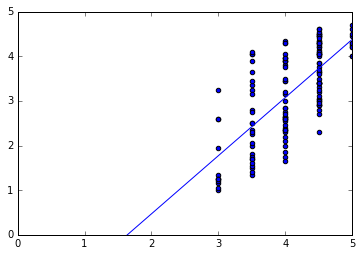

In [48]:
predict_scatter(df_norm['fandango'], df_norm['rt'])

In [52]:
def predict_scatter_all(x):
    
    data_list = [df_norm['fandango'],
                 df_norm['rt'],
                 df_norm['mc'],
                 df_norm['imdb']
                ]
    
    for dat in data_list:
        print('Against: ' + dat.name)
        predict_scatter(x, dat)

fandango
R Squared: 1.0


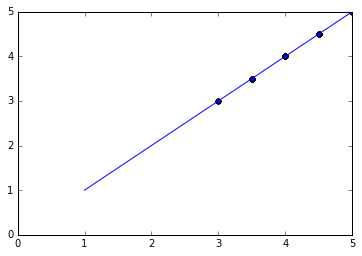

rt
R Squared: 0.703683309562


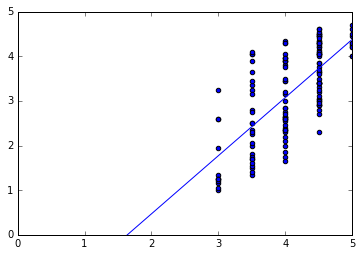

mc
R Squared: 0.33749746434


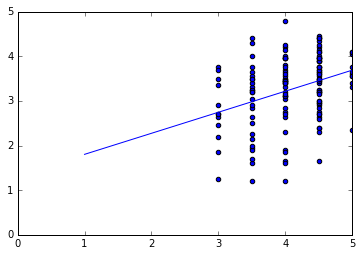

imdb
R Squared: 0.58729513366


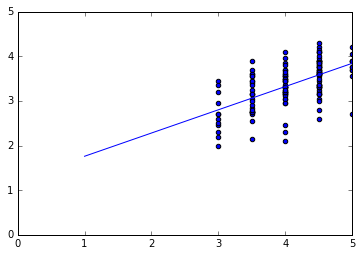

In [50]:
predict_scatter_all(df_norm['fandango'])

Against: fandango
R Squared: 0.33749746434


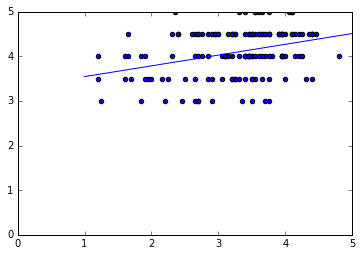

Against: rt
R Squared: 0.68713165178


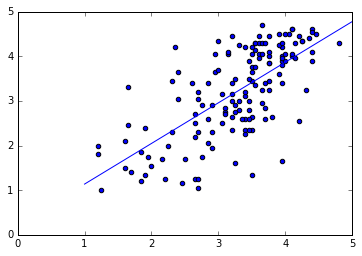

Against: mc
R Squared: 1.0


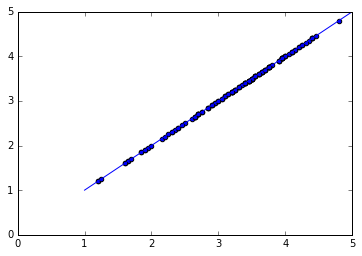

Against: imdb
R Squared: 0.756265373136


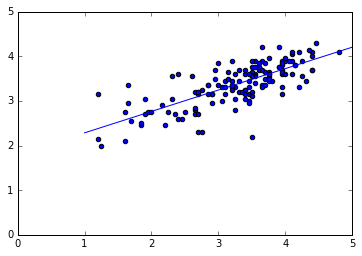

In [53]:
predict_scatter_all(df_norm['mc'])